In [116]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
sns.set_theme(
    rc={"font.sans-serif": "Arial"},
)

In [117]:
def load_data(path):
    data = loadmat(path)
    data.pop("__header__")
    data.pop("__version__")
    data.pop("__globals__")
    data = {key: np.squeeze(val) for key, val in data.items()}
    df = pd.DataFrame.from_dict(data)
    df["datetime"] = pd.to_datetime(df["timestamp"])
    return df

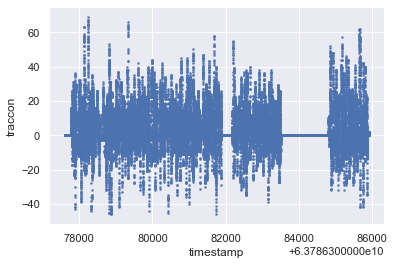

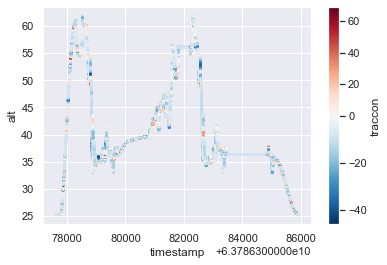

In [128]:
df = load_data("..\data\cph1_traccon_taskID_7805_pass_1.mat")
df["traccon"] = df["traccon"] - 160.

sns.scatterplot(
    data=df,
    x="timestamp",
    y="traccon",
    edgecolor=None,
    s=5,
)

fig, ax = plt.subplots()
cmap = cm.get_cmap("RdBu_r")
vcenter = 0
vmin, vmax = df["traccon"].min(), df["traccon"].max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
ax = sns.scatterplot(
    data=df,
    x="timestamp",
    y="alt",
    hue="traccon",
    edgecolor=None,
    s=5,
    legend=False,
    ax=ax,
    norm=normalize,
    palette=cmap,
)
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=cmap)
scalarmappaple.set_array(df["traccon"])
fig.colorbar(scalarmappaple, label="traccon")

In [129]:
df = load_data("..\data\cph1_vehspd_taskID_7805_pass_1.mat")

fig = px.scatter_mapbox(
    df.sample(3000),
    lat="lat",
    lon="lon",
    color="alt",
    zoom=10,
    title="CPH1",
    mapbox_style="open-street-map",
)
fig.show()

<AxesSubplot:xlabel='timestamp', ylabel='alt'>

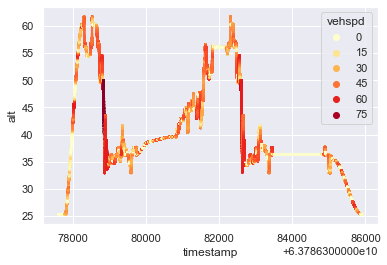

In [125]:
sns.scatterplot(
    data=df,
    x="timestamp",
    y="alt",
    hue="vehspd",
    edgecolor=None,
    s=5,
    palette=cm.YlOrRd,
)